Training started...
Processing dataset: 605_fri_c2_250_25.tsv
{'regression__booster': 'gbtree', 'regression__max_depth': 3, 'regression__n_estimators': 200, 'regression__random_state': 3111696}
R-square score: 0.83


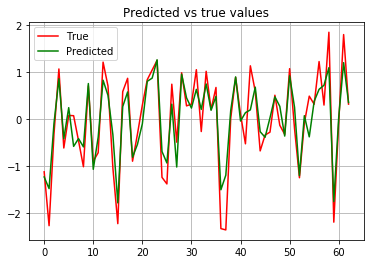

---------------------


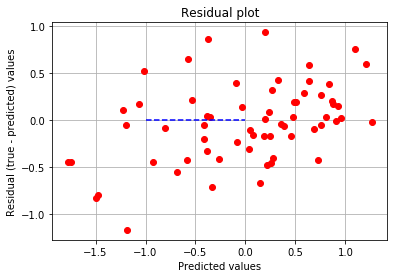

Finished dataset: 605_fri_c2_250_25.tsv
------------------------------------------------------------
Processing dataset: 579_fri_c0_250_5.tsv
{'regression__booster': 'dart', 'regression__max_depth': 2, 'regression__n_estimators': 200, 'regression__random_state': 3111696}
R-square score: 0.85


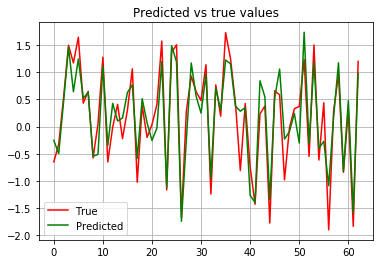

---------------------


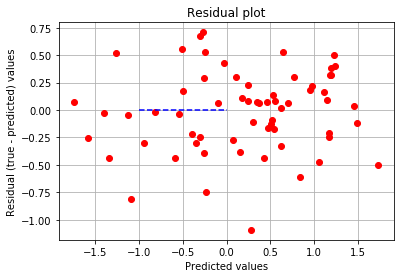

Finished dataset: 579_fri_c0_250_5.tsv
------------------------------------------------------------
Processing dataset: 623_fri_c4_1000_10.tsv
{'regression__booster': 'dart', 'regression__max_depth': 4, 'regression__n_estimators': 200, 'regression__random_state': 3111696}
R-square score: 0.94


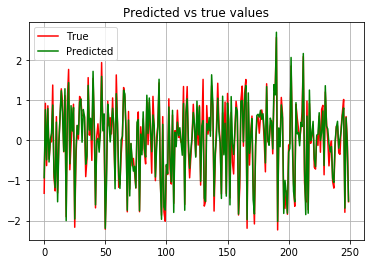

---------------------


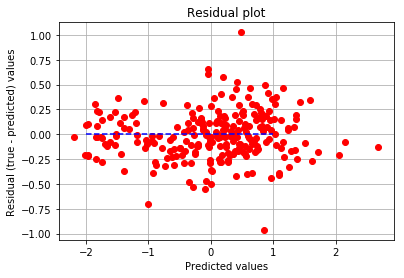

Finished dataset: 623_fri_c4_1000_10.tsv
------------------------------------------------------------
Processing dataset: 592_fri_c4_1000_25.tsv
{'regression__booster': 'gbtree', 'regression__max_depth': 5, 'regression__n_estimators': 200, 'regression__random_state': 3111696}
R-square score: 0.91


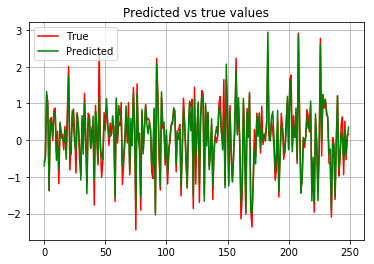

---------------------


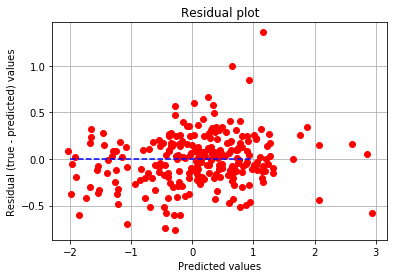

Finished dataset: 592_fri_c4_1000_25.tsv
------------------------------------------------------------
Processing dataset: 617_fri_c3_500_5.tsv
{'regression__booster': 'gbtree', 'regression__max_depth': 4, 'regression__n_estimators': 200, 'regression__random_state': 3111696}
R-square score: 0.91


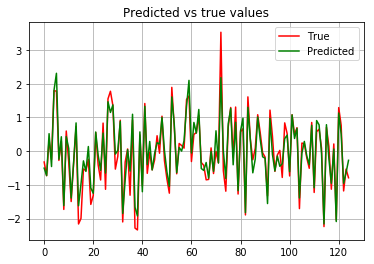

---------------------


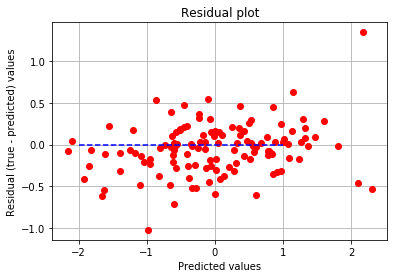

Finished dataset: 617_fri_c3_500_5.tsv
------------------------------------------------------------
Processing dataset: 227_cpu_small.tsv


KeyboardInterrupt: 

In [4]:
import sys
import time
import pandas as pd
from sklearn import model_selection
from sklearn import ensemble, metrics, cluster, tree
from matplotlib import pyplot as plt
import scipy
import os
from xgboost import XGBRegressor
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn.feature_selection import *
from sklearn.model_selection import GridSearchCV, KFold

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
start_time = time.time()
datasets = ["228_elusage.tsv", "485_analcatdata_vehicle.tsv", "523_analcatdata_neavote.tsv", \
            '663_rabe_266.tsv', '687_sleuth_ex1605.tsv']


regressor = Pipeline([
  ('regression', XGBRegressor())
])

parameters = [{ \
    'regression__max_depth': [1, 2, 3, 4, 5], \
    'regression__n_estimators': [10, 50, 100, 200], \
    'regression__booster': ['gbtree', 'gblinear', 'dart'], \
    'regression__random_state': [3111696] \
}]

print('Training started...')
dataset_accuracies = list()
r2_scores = list()
for d_set in os.listdir('data/'):
    print("Processing dataset: %s" % d_set)
    data_path = "data/" + d_set
    df = pd.read_csv(data_path, sep="\t")
    label = df["target"].copy()
    data = df.drop("target", axis=1)
    X_train, X_test, y_train, y_test = model_selection.train_test_split(data, label, test_size=0.25, random_state=42)
    
    X_train = X_train.values
    X_test = X_test.values
    y_train = y_train.values
    y_test = y_test.values
    
    optimized_regressor = GridSearchCV(regressor, parameters, cv=5, error_score=0)
    
    optimized_regressor.fit(X_train, y_train)
    best_regressor = optimized_regressor.best_estimator_
    best_result = optimized_regressor.cv_results_
    
    print(optimized_regressor.best_params_)
    prediction = best_regressor.predict(X_test)
    
    r2_square = metrics.r2_score(y_test, prediction)
    r2_scores.append(r2_square)
    residual = y_test - prediction
    print("R-square score: %0.2f" % r2_square)
    
    plt.figure()
    plt.plot(y_test, color='r')
    plt.plot(prediction, color='g')
    plt.grid(True)
    plt.legend(['True', 'Predicted'])
    plt.title('Predicted vs true values')
    plt.show()
    
    print("---------------------")
    
    plt.figure()
    plt.plot(prediction, residual, 'ro')
    max_pred = int(np.max(prediction))
    min_pred = int(np.min(prediction))
    plt.plot(np.arange(min_pred, max_pred), [0 for i in range(max_pred - min_pred)], 'b--')
    plt.grid(True)
    plt.xlabel('Predicted values')
    plt.ylabel('Residual (true - predicted) values')
    plt.title('Residual plot')
    plt.show()
    
    print("Finished dataset: %s" % d_set)
    print("------------------------------------------------------------")

print('Training finished')
print("Mean R2 square: \n", np.mean(r2_scores))
end_time = time.time()
print('Total time taken: %d seconds' % int(end_time - start_time))